In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# import codecs, json
# import matplotlib.pyplot as plt
# import math
import scipy
from scipy import linalg
# from scipy import stats

import ps1_functions as ps1_fx

# 3 Experiment 1: Swiss Roll Dataset


## 3.1 Understanding the Data Set

Use the provided function read_json_files() to read the two JSON files containing the data, swiss roll points.json and swiss roll labels.json. The swiss roll points.json contains 2000 points, each with 3 features and
swiss roll labels.json contains labels for each of the 2000 points, ranging from 0 to 1. Pre-process the
data by centering it (i.e. data points have zero mean). Next, visualize this data set using a scatter plot
where the provided features are x, y, and z coordinates and each point is colored by its label.

swiss_pts shape:  (2000, 3) swiss_labels shape:  (2000,)
Range of swiss_labels: [ 0.000276440241967576 , 1.0 ]
Mean of the centered swiss_pts and swiss_labels are [3.08086889e-17 4.72955008e-16 1.24993349e-14] -3.019806626980426e-17


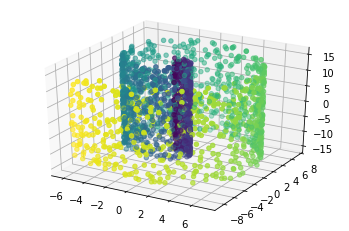

In [3]:
swiss_pts = ps1_fx.load_json_files("swiss_roll_points.json")
swiss_labels = ps1_fx.load_json_files("swiss_roll_labels.json")

print("swiss_pts shape: ", swiss_pts.shape, "swiss_labels shape: ", swiss_labels.shape)
print("Range of swiss_labels: [", min(swiss_labels), ",", max(swiss_labels), "]")

# Mean centering
swiss_pts -= np.mean(swiss_pts, axis=0)
swiss_labels -= np.mean(swiss_labels, axis=0)

print("Mean of the centered swiss_pts and swiss_labels are", np.mean(swiss_pts,axis=0), np.mean(swiss_labels,axis=0))

# Data visualization using scatter plot using features x,y,z and color the point by label
# x = []
# y = []
# z = []

# for i in swiss_pts:
#   x.append(i[0])
#   y.append(i[1])
#   z.append(i[2])

x = swiss_pts[:,0]
y = swiss_pts[:,1]
z = swiss_pts[:,2]

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x, y, z, c = swiss_labels)

**Question 3.1**. What does this visualization of the swiss roll data set look like? What properties do you notice about the data set? Are the provided labels meaningful, and if so, in what way? How do you expect a “good” dimensionality reduction technique to look for the swiss roll data set?

From the visualization above, it seems there is clustering along a manifold. The provided labels are meaningful in that along the manifold, we can see a clear color gradient from the inside of the manifold to the outside. This shows the difference in distance along the manifold color gradient. As for dimensionality reduction, if we can remove the : legit if you just got rid of the Z dimension of every point in the dataset you are left with 2 features and a regression label. You can't use linear regression because it isn't linear at all, but a different regression or a neural network would have a very easy time.

## 3.2 Visualizing Data with PCA
Now that we have an understanding of the swiss roll data set and how we expect a successful dimensionality reduction to look, it’s time to experiment. We’ll start with PCA.

### 1. Run PCA on the swiss roll data set, obtaining the principal components, projections, and singular values

In [4]:
u, s, vt = np.linalg.svd(swiss_pts,full_matrices=False) #(2000, 3) (3,) (3, 3)
v = vt.T
S = np.diag(s) #(3, 3)
projection = np.matmul(swiss_pts, v)
print("PC",v)
print("projection: ",projection) #projection = X*v = columns of US
# print("projection", u.dot(S)) 
# projection called loading
print("singular values: ",s)

# The following code is to do PCA. We double check the previous result

# C = np.cov(swiss_pts, rowvar=False) # covariance matrix with shape p x p 
# eig_val, eig_vector = np.linalg.eig(C)
# idx = eig_val.argsort()[::-1] # sort wrt eigenvalues
# eig_val, eig_vector = eig_val[idx], eig_vector[:, idx]
# print("eigenvalue: ", eig_val)
# # print("eigenvector: ", eig_vector)

# projection = swiss_pts.dot(eig_vector) # PC = projections of X on the eigenvector
# print("projection", projection)

PC [[ 0.01342441 -0.0454883  -0.99887467]
 [-0.02018733  0.99874874 -0.04575387]
 [ 0.99970609  0.02077883  0.01248932]]
projection:  [[  4.01541113  -3.0419295   -6.45378697]
 [-10.40102067   0.58000427  -7.18121979]
 [ 15.13618491  -3.10452446  -6.18886907]
 ...
 [-10.05496844   0.91436147   0.58339848]
 [  1.3144476    7.22479456   0.34384618]
 [ 13.43855012   1.39156608  -0.41830526]]
singular values:  [388.60459679 194.04638291 165.55193519]


### 2. Plot the swiss roll in two dimensions, using the principal components. You might wish to try different combinations, since there are few of them (i.e. the first and second components, the first and third components, the second and third components.).Color the points with their corresponding labels.

Text(0.5, 1.0, 'The second and third components')

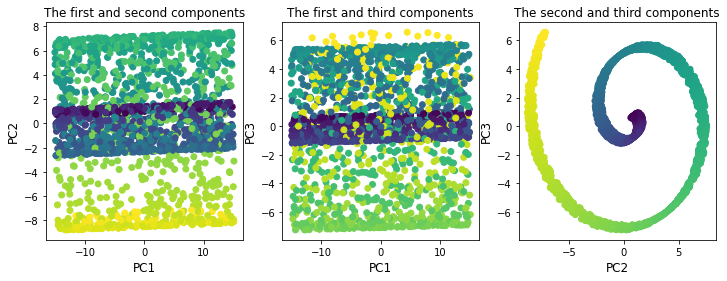

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(12,4))

axes[0].scatter(x=projection[:,0], y=projection[:,1], c=swiss_labels)
axes[0].set_xlabel('PC1', size=12)
axes[0].set_ylabel('PC2', size=12)
axes[0].set_title("The first and second components" )

axes[1].scatter(x=projection[:,0], y=projection[:,2], c=swiss_labels)
axes[1].set_xlabel('PC1', size=12)
axes[1].set_ylabel('PC3', size=12)
axes[1].set_title("The first and third components" )

axes[2].scatter(x=projection[:,1], y=projection[:,2], c=swiss_labels)
axes[2].set_xlabel('PC2', size=12)
axes[2].set_ylabel('PC3', size=12)
axes[2].set_title("The second and third components" )

### 3. Plot the singular values in whatever way you see fit. This could be a plot of the singular values themselves, their cumulative sum, or the “explained variance” $S^2/(n − 1)$, where S are the singular values and n is the number of points.

[75.54453859 18.83641757 13.71057691]


Text(0.5, 1.0, 'Explained Variance S^2/(n-1)')

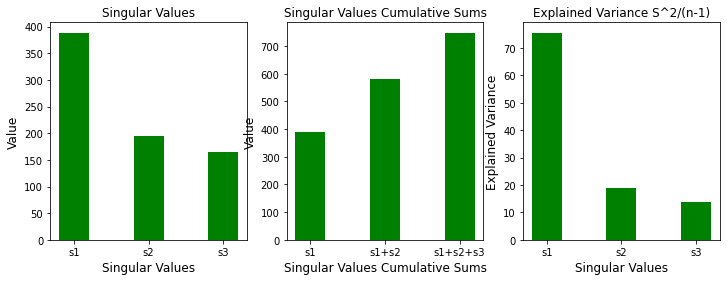

In [6]:
x = list(["s1","s2","s3"])
# singular value, larger-> more variance explained!
fig, axes = plt.subplots(1, 3, figsize=(12,4))

axes[0].bar(x, s, color ='green',  width = 0.4)
axes[0].set_xlabel('Singular Values', size=12)
axes[0].set_ylabel('Value', size=12)
axes[0].set_title("Singular Values" )

cumsum_x = (["s1","s1+s2","s1+s2+s3"])
cumsum = np.cumsum(s)
axes[1].bar(cumsum_x, cumsum, color ='green',  width = 0.4)
axes[1].set_xlabel('Singular Values Cumulative Sums', size=12)
axes[1].set_ylabel('Value', size=12)
axes[1].set_title("Singular Values Cumulative Sums" )


explained_var = (s**2)/(len(swiss_pts)-1)
print(explained_var)
axes[2].bar(x, explained_var, color ='green',  width = 0.4)
axes[2].set_xlabel('Singular Values', size=12)
axes[2].set_ylabel('Explained Variance', size=12)
axes[2].set_title("Explained Variance S^2/(n-1)" )


**Question 3.2**. As a dimensionality reduction technique, to what extent does PCA retain properties of the swiss roll data set? Can you explain why the visualizations look like this, given how the algorithm works? What can you learn about the intrinsic dimensionality from the singular values?

PCA has done well to transform our data using the second and third components. What this PCA does in this case is essentially remove the Z dimension from the first visualization, which serves little meaning, which means our data is intrinsically two dimensional. However, comparing other components, the visualizations give little indication that PCA would improve a model’s performance using anything other than the second and third components.

## 3.3 Visualizing Data with Diffusion Maps
Now we will look at diffusion maps as a dimensionality reduction technique. Recall that for each point x in our data set, $\Psi_{t}(x)
$ is an n-dimensional vector 4 so when we visualize it, we can only visualize two or three dimensional slices. Your tasks will be to

### 1. Construct the diffusion map $\Psi_{t}$ of the swiss roll data set using euclidean distance, Gaussian kernel with width $\sigma = 3.0$, and diffusion parameter $t = 1$.


In [ ]:
# When sigma = 3.0
D = ps1_fx.compute_distances(swiss_pts)
W_sigma3 = ps1_fx.compute_affinity_matrix(D, "gaussian", 3, None)
diff_vec_sigma3, diff_eig_sigma3 = ps1_fx.diff_map_info(W_sigma3)
diff_map_sigma3 = ps1_fx.get_diff_map(diff_vec_sigma3, diff_eig_sigma3, 3)

### 2. Create two-dimensional scatter plots of the diffusion mapping using different coordinates.

### 3. Plot the eigenvalues $\lambda_i$ of the Markov matrix $M$

Text(0.5, 1.0, 'The second and third coordinates')

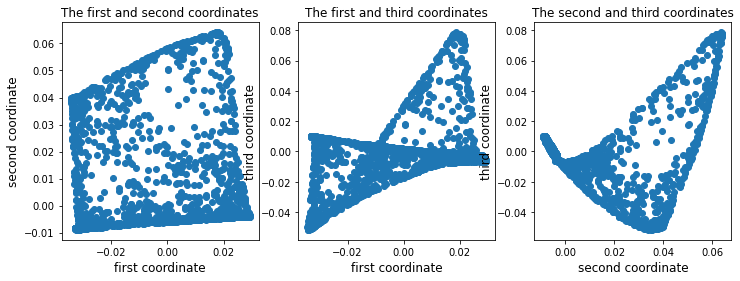

In [ ]:
# 2 dimensional plots
fig, axes = plt.subplots(1, 3, figsize=(12,4))

axes[0].scatter(x=diff_map[:,0], y=diff_map[:,1])
axes[0].set_xlabel('first coordinate', size=12)
axes[0].set_ylabel('second coordinate', size=12)
axes[0].set_title("The first and second coordinates" )

axes[1].scatter(x=diff_map[:,0], y=diff_map[:,2])
axes[1].set_xlabel('first coordinate', size=12)
axes[1].set_ylabel('third coordinate', size=12)
axes[1].set_title("The first and third coordinates" )

axes[2].scatter(x=diff_map[:,1], y=diff_map[:,2])
axes[2].set_xlabel('second coordinate', size=12)
axes[2].set_ylabel('third coordinate', size=12)
axes[2].set_title("The second and third coordinates" )

Text(0.5, 1.0, 'Eigenvalues of the Markov matrix')

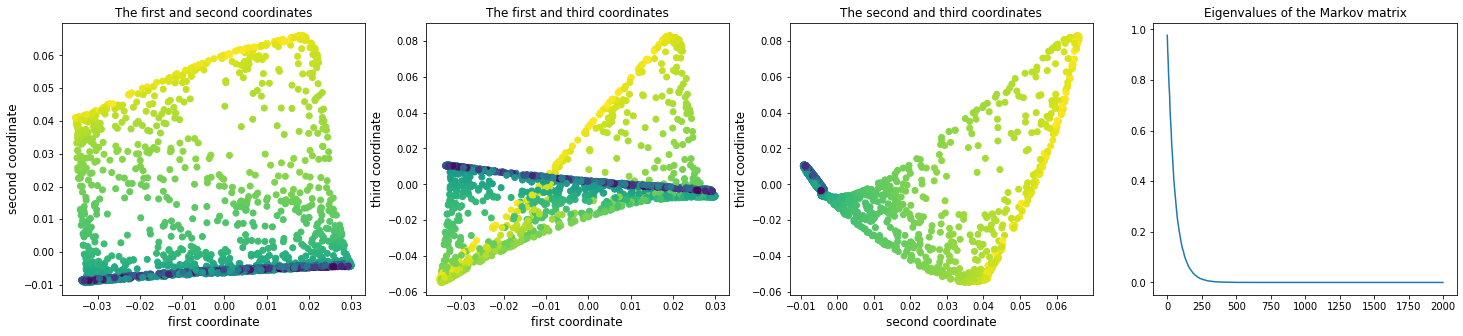

In [ ]:
# 3 dimensional plots
fig1, axes1 = plt.subplots(1, 4, figsize=(25,5))

axes1[0].scatter(x=diff_map_sigma3[:,0], y=diff_map_sigma3[:,1], c=swiss_labels)
axes1[0].set_xlabel('first coordinate', size=12)
axes1[0].set_ylabel('second coordinate', size=12)
axes1[0].set_title("The first and second coordinates" )

axes1[1].scatter(x=diff_map_sigma3[:,0], y=diff_map_sigma3[:,2], c=swiss_labels)
axes1[1].set_xlabel('first coordinate', size=12)
axes1[1].set_ylabel('third coordinate', size=12)
axes1[1].set_title("The first and third coordinates" )

axes1[2].scatter(x=diff_map_sigma3[:,1], y=diff_map_sigma3[:,2], c=swiss_labels)
axes1[2].set_xlabel('second coordinate', size=12)
axes1[2].set_ylabel('third coordinate', size=12)
axes1[2].set_title("The second and third coordinates" )

axes1[3].plot(diff_eig_sigma3)
axes1[3].set_title("Eigenvalues of the Markov matrix" )

### 4. Repeat for $\sigma=1.0$ and $\sigma=6.0$



Text(0.5, 1.0, 'Eigenvalues of the Markov matrix')

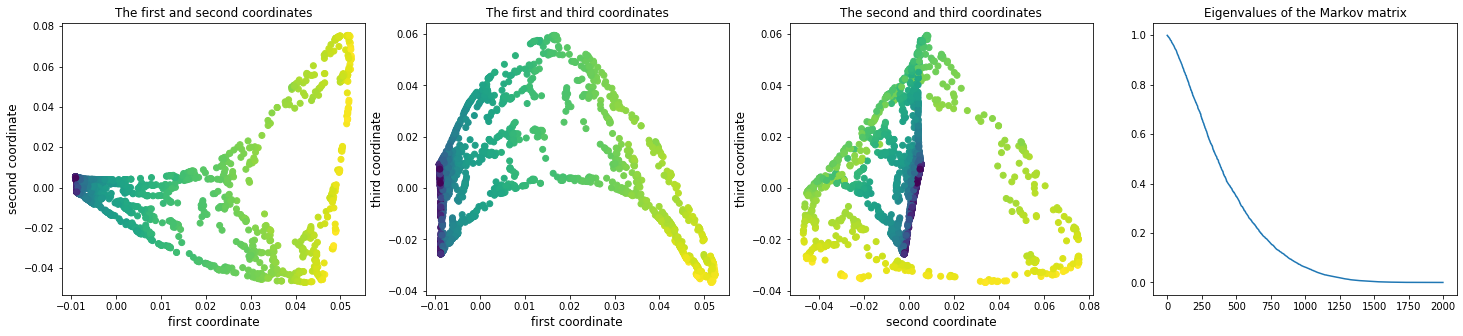

In [ ]:
# When sigma = 1.0
W_sigma1 = ps1_fx.compute_affinity_matrix(D_sigma1, "gaussian", 1, None)
diff_vec_sigma1, diff_eig_sigma1 = ps1_fx.diff_map_info(W_sigma1)
diff_map_sigma1 = ps1_fx.get_diff_map(diff_vec_sigma1, diff_eig_sigma1, 1)

# 3 dimensional plots
fig, axes = plt.subplots(1, 4, figsize=(25,5))

axes[0].scatter(x=diff_map_sigma1[:,0], y=diff_map_sigma1[:,1], c=swiss_labels)
axes[0].set_xlabel('first coordinate', size=12)
axes[0].set_ylabel('second coordinate', size=12)
axes[0].set_title("The first and second coordinates" )

axes[1].scatter(x=diff_map_sigma1[:,0], y=diff_map_sigma1[:,2], c=swiss_labels)
axes[1].set_xlabel('first coordinate', size=12)
axes[1].set_ylabel('third coordinate', size=12)
axes[1].set_title("The first and third coordinates" )

axes[2].scatter(x=diff_map_sigma1[:,1], y=diff_map_sigma1[:,2], c=swiss_labels)
axes[2].set_xlabel('second coordinate', size=12)
axes[2].set_ylabel('third coordinate', size=12)
axes[2].set_title("The second and third coordinates" )

axes[3].plot(diff_eig_sigma1)
axes[3].set_title("Eigenvalues of the Markov matrix" )

Text(0.5, 1.0, 'Eigenvalues of the Markov matrix')

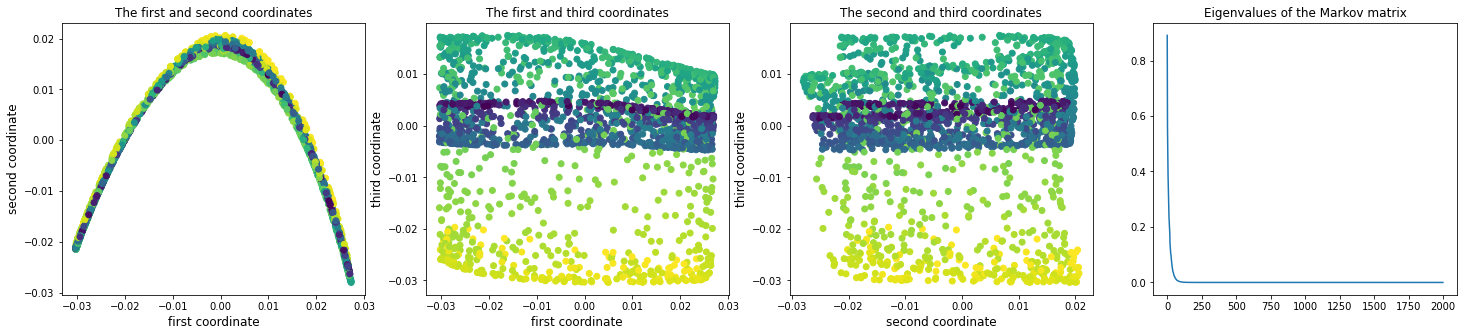

In [ ]:
# When sigma = 6.0
W_sigma6 = ps1_fx.compute_affinity_matrix(D, "gaussian", 6, None)
diff_vec_sigma6, diff_eig_sigma6 = ps1_fx.diff_map_info(W_sigma6)
diff_map_sigma6 = ps1_fx.get_diff_map(diff_vec_sigma6, diff_eig_sigma6, 1)

# 3 dimensional plots
fig3, axes3 = plt.subplots(1, 4, figsize=(25,5))

axes3[0].scatter(x=diff_map_sigma6[:,0], y=diff_map_sigma6[:,1], c=swiss_labels)
axes3[0].set_xlabel('first coordinate', size=12)
axes3[0].set_ylabel('second coordinate', size=12)
axes3[0].set_title("The first and second coordinates" )

axes3[1].scatter(x=diff_map_sigma6[:,0], y=diff_map_sigma6[:,2], c=swiss_labels)
axes3[1].set_xlabel('first coordinate', size=12)
axes3[1].set_ylabel('third coordinate', size=12)
axes3[1].set_title("The first and third coordinates" )

axes3[2].scatter(x=diff_map_sigma6[:,1], y=diff_map_sigma6[:,2], c=swiss_labels)
axes3[2].set_xlabel('second coordinate', size=12)
axes3[2].set_ylabel('third coordinate', size=12)
axes3[2].set_title("The second and third coordinates" )

axes3[3].plot(diff_eig_sigma6)
axes3[3].set_title("Eigenvalues of the Markov matrix" )

**Question 3.3**. As a dimensionality reduction technique, to what extent does diffusion mapping retain prop- erties of the swiss roll data set? Can you explain why the visualizations look like this, given how the algorithm works? What can you learn about the intrinsic dimensionality of the data set from the eigenvalues of M? How does the choice of Gaussian kernel width σ change the embedding and why?



## 3.4 Understanding the First Eigenvector of the Markov Matrix
Now let’s see a curious property of the first left eigenvector of the Markov matrix. Your task will be to

### 1. Construct the affinity matrix of the swiss roll data set using euclidean distance and Gaussian kernel with width σ = 1.0.


### 2. Compute the largest left eigenvector $\phi_1$ of $M = D^{−1}W$, which may be obtained as $\phi_{1}=v_{1} D^{1 / 2}$

### 3. Plot the swiss roll in 3 dimensions using the original coordinates and color the points using the corre-sponding values in φ1.


In [ ]:
# We generated affinity matrix using Gaussian kernal with sigma = 1 before such that
# W_sigma1 = ps1_fx.compute_affinity_matrix(D_sigma1, "gaussian", 1, None)

D = np.diag(W_sigma1.sum(axis=1)) 
semi_D = scipy.linalg.fractional_matrix_power(D, 1/2)
phi1 = diff_vec_sigma1[:,0].dot(semi_D)

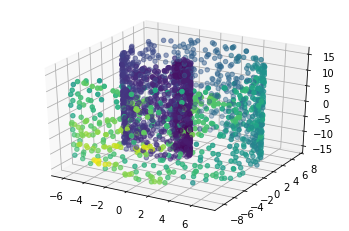

In [ ]:
x = swiss_pts[:,0]
y = swiss_pts[:,1]
z = swiss_pts[:,2]

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x, y, z, c = phi1)

**Question 3.4**. How do the values in φ1 correspond to the structure of the swiss roll? Can you explain what
you are seeing in terms of diffusion?

## 3.5 Using an Adaptive Gaussian Kernel
We have seen the advantages of diffusion maps over PCA in the last portion of the experiment; however, the Gaussian kernel width σ was fixed for all data points. In this portion of Experiment 1, we’ll see the effect of using an adaptive Gaussian kernel. To this end, we will use an adaptive k-nearest neighbors kernel, defined in the following way. Let the k-nearest neighbors kernel κk-nn be given by
$$
\kappa_{k-n n}\left(x_{i}, x_{j}\right)=\frac{1}{2}\left(\exp \left(-\frac{\left\|x_{i}-x_{j}\right\|^{2}}{\sigma_{k}\left(x_{i}\right)^{2}}\right)+\exp \left(-\frac{\left\|x_{i}-x_{j}\right\|^{2}}{\sigma_{k}\left(x_{j}\right)^{2}}\right)\right)
$$

where σk(x) is the distance from x to its kth nearest neighbor. Note that κk-nn satisfies the properties of a kernel. Let σk-nn = {σ1, . . . , σn} denote these choices of adaptively chosen kernel parameters, for a fixed k. Now that we have defined this new adaptive kernel, let’s see how it performs differently that a fixed-width kernel. Your tasks for this portion of Experiment 1 are


### 1. Construct the diffusion map $\Psi_{t}$ of the swiss roll data set using euclidean distance, adaptive k-nearest neighbor Gaussian kernel with $k = 5$, and diffusion parameter $t = 1$.
### 2. Create two-dimensional scatter plots of the diffusion mapping using different coordinates.
### 3. Plot the eigenvalues $\lambda_i$ of the Markov matrix $M$



In [43]:
tt = D[10:20,10:20]
a = ps1_fx.compute_affinity_matrix(tt, "adaptive", None, 5)
a

array([[1.        , 0.71138038, 0.4650623 , 0.32764911, 0.26859588,
        0.34225881, 0.23109949, 0.82975118, 0.42877162, 0.46461262],
       [0.71138038, 1.        , 0.33033789, 0.31527356, 0.17848444,
        0.36787944, 0.28035693, 0.48683942, 0.79846585, 0.44289153],
       [0.4650623 , 0.33033789, 1.        , 0.17937364, 0.66763698,
        0.09167535, 0.40259084, 0.25191951, 0.15446579, 0.16492103],
       [0.32764911, 0.31527356, 0.17937364, 1.        , 0.19829761,
        0.63343269, 0.52947012, 0.39762397, 0.30975367, 0.79825794],
       [0.26859588, 0.17848444, 0.66763698, 0.19829761, 1.        ,
        0.11943295, 0.34556128, 0.2163622 , 0.11007175, 0.18055457],
       [0.34225881, 0.36787944, 0.09167535, 0.63343269, 0.11943295,
        1.        , 0.20364924, 0.53210616, 0.51757883, 0.79025357],
       [0.23109949, 0.28035693, 0.40259084, 0.52947012, 0.34556128,
        0.20364924, 1.        , 0.1728184 , 0.22223131, 0.29290909],
       [0.82975118, 0.48683942, 0.2519195

In [62]:
a = np.zeros((D.shape[0],2))
a[:,1]

array([0., 0., 0., ..., 0., 0., 0.])

In [68]:
def compute_affinity_matrix(D, kernel_type, sigma=None, k=None):
    '''
    Construct an affinity matrix from a distance matrix via gaussian kernel.

    Inputs:
        D               a numpy array of size n x n containing the distances between points
        kernel_type     a string, either "gaussian" or "adaptive".
                            If kernel_type = "gaussian", then sigma must be a positive number
                            If kernel_type = "adaptive", then k must be a positive integer
        sigma           the non-adaptive gaussian kernel parameter
        k               the adaptive kernel parameter

    Outputs:
        W       a numpy array of size n x n that is the affinity matrix

    Examples:
        W = compute_affinity_matrix(D, "adaptive", None, 5)
        W = compute_affinity_matrix(D, "gaussian", 3, None)
    '''
    if kernel_type=='gaussian':
      if sigma <= 0:
        raise ValueError('sigma must be a positive number')
      else:
        W = np.exp(-D*D/(sigma**2))
             
    if kernel_type=='adaptive':
        if k < 0 or type(k) != int:
          raise ValueError('k must be a positive integer')
        else:
          W = np.zeros(shape = np.shape(D))

          sigma_vector = np.zeros((D.shape[0],2))

          # acquire distance from x_i to x_j, k nearest neighbor for the ith row and jth row  
          for i in range(len(D)):
            sigma_vector[i,0] = i
            sigma_vector[i,1] = np.sort(D[i])[k]

          for i in range(len(D)):
            for j in range(len(D)):
              dist = D[i]
              sigma_x_i = sigma_vector[i,0]
              sigma_x_j = j_vector[i,j]

              # compute adaptive knn kernel based on the formula
              first_exp_term = np.exp((-1 * (dist**2)) / (sigma_x_i ** 2))
              second_exp_term = np.exp((-1 * (dist**2)) / (sigma_x_j ** 2))
              W[i, j] = 0.5 * (first_exp_term + second_exp_term)

        # # The following code works, but toooooo slow! So I splited the nested two loops in multiple loops as above
        # for i in range(len(D)):
        #   for j in range(len(D)):
        #     # acquire distance from x_i to x_j, k nearest neighbor for the ith row and jth row
        #     dist = D[i, j]
        #     sigma_x_i = np.sort(D[i])[k] # we use k instead of k-1 because self doesn't count as self's neighbor
        #     sigma_x_j = np.sort(D[j])[k]

        #     # compute adaptive knn kernel based on the formula
        #     first_exp_term = np.exp((-1 * (dist**2)) / (sigma_x_i ** 2))
        #     second_exp_term = np.exp((-1 * (dist**2)) / (sigma_x_j ** 2))
        #     W[i, j] = 0.5 * (first_exp_term + second_exp_term)

    # return the affinity matrix
    return W


In [69]:
compute_affinity_matrix(tt, "adaptive", None, 5)

computing affinity matrix with adaptive kernel
finished!


array([[1.        , 0.94765355, 0.93361178, 0.91336329, 0.91072725,
        0.90893893, 0.90811339, 0.96223931, 0.92153548, 0.9121943 ],
       [0.94765355, 1.        , 0.91527627, 0.90830405, 0.88232463,
        0.90913028, 0.90912405, 0.92458758, 0.95725448, 0.90767966],
       [0.93361178, 0.91527627, 1.        , 0.90581821, 0.96566051,
        0.87196043, 0.94374766, 0.91005293, 0.89532385, 0.86288647],
       [0.91336329, 0.90830405, 0.90581821, 1.        , 0.90670752,
        0.94149306, 0.94396199, 0.92067905, 0.91134561, 0.95295504],
       [0.91072725, 0.88232463, 0.96566051, 0.90670752, 1.        ,
        0.86435756, 0.94759216, 0.90043457, 0.8740936 , 0.84301835],
       [0.90893893, 0.90913028, 0.87196043, 0.94149306, 0.86435756,
        1.        , 0.89690744, 0.92922927, 0.92796112, 0.94950987],
       [0.90811339, 0.90912405, 0.94374766, 0.94396199, 0.94759216,
        0.89690744, 1.        , 0.89796686, 0.90686991, 0.88985136],
       [0.96223931, 0.92458758, 0.9100529

In [40]:
# k = 5
W_k5 = ps1_fx.compute_affinity_matrix(D, "adaptive", None, 5)
diff_vec_k5, diff_eig_k5 = ps1_fx.diff_map_info(W_k5)
diff_map_k5 = ps1_fx.get_diff_map(diff_vec_k5, diff_eig_k5, 1)

# 3 dimensional plots
fig, axes = plt.subplots(1, 4, figsize=(25,5))

axes[0].scatter(x=diff_map_k5[:,0], y=diff_map_k5[:,1], c=swiss_labels)
axes[0].set_xlabel('first coordinate', size=12)
axes[0].set_ylabel('second coordinate', size=12)
axes[0].set_title("The first and second coordinates" )

axes[1].scatter(x=diff_map_k5[:,0], y=diff_map_k5[:,2], c=swiss_labels)
axes[1].set_xlabel('first coordinate', size=12)
axes[1].set_ylabel('third coordinate', size=12)
axes[1].set_title("The first and third coordinates" )

axes[2].scatter(x=diff_map_k5[:,1], y=diff_map_k5[:,2], c=swiss_labels)
axes[2].set_xlabel('second coordinate', size=12)
axes[2].set_ylabel('third coordinate', size=12)
axes[2].set_title("The second and third coordinates" )

axes[3].plot(diff_eig_k5)
axes[3].set_title("Eigenvalues of the Markov matrix" )

KeyboardInterrupt: ignored

### 4. Repeat for k = 10

In [ ]:
# k = 10
W_k10 = ps1_fx.compute_affinity_matrix(D, "adaptive", None, 5)
diff_vec_k10, diff_eig_k10 = ps1_fx.diff_map_info(W_k10)
diff_map_k10 = ps1_fx.get_diff_map(diff_vec_k10, diff_eig_k10, 1)

# 3 dimensional plots
fig, axes = plt.subplots(1, 4, figsize=(25,5))

axes[0].scatter(x=diff_map_k10[:,0], y=diff_map_k10[:,1], c=swiss_labels)
axes[0].set_xlabel('first coordinate', size=12)
axes[0].set_ylabel('second coordinate', size=12)
axes[0].set_title("The first and second coordinates" )

axes[1].scatter(x=diff_map_k10[:,0], y=diff_map_k10[:,2], c=swiss_labels)
axes[1].set_xlabel('first coordinate', size=12)
axes[1].set_ylabel('third coordinate', size=12)
axes[1].set_title("The first and third coordinates" )

axes[2].scatter(x=diff_map_k10[:,1], y=diff_map_k10[:,2], c=swiss_labels)
axes[2].set_xlabel('second coordinate', size=12)
axes[2].set_ylabel('third coordinate', size=12)
axes[2].set_title("The second and third coordinates" )

axes[3].plot(diff_eig_k10)
axes[3].set_title("Eigenvalues of the Markov matrix" )

In [ ]:
def compute_affinity_matrix(D, sigma=None, k=None):
    W = np.zeros(shape = np.shape(D))

    for i in range(len(D)):
      for j in range(len(D)):
        # acquire distance from x_i to x_j, k nearest neighbor for the ith row and jth row
        dist = D[i, j]
        sigma_x_i = np.sort(D[i])[k]
        sigma_x_j = np.sort(D[j])[k]

        # compute adaptive knn kernel based on the formula
        first_exp_term = np.exp((-1 * (dist**2)) / (sigma_x_i ** 2))
        second_exp_term = np.exp((-1 * (dist**2)) / (sigma_x_j ** 2))
        W[i, j] = 0.5 * (first_exp_term + second_exp_term)

    # return the affinity matrix
    return W

In [ ]:
D_subset = D[0:10,0:10]

In [ ]:
def compute_affinity_matrix(D, kernel_type, sigma=None, k=None):
    W = np.zeros(shape = np.shape(D))
    for i in range(len(D)):
      for j in range(len(D)):
        # acquire distance from x_i to x_j, k nearest neighbor for the ith row and jth row
        dist = D[i, j]
        sigma_x_i = np.sort(D[i])[k] # we use k instead of k-1 because self doesn't count as self's neighbor
        sigma_x_j = np.sort(D[j])[k]

        # compute adaptive knn kernel based on the formula
        first_exp_term = np.exp((-1 * (dist**2)) / (sigma_x_i ** 2))
        second_exp_term = np.exp((-1 * (dist**2)) / (sigma_x_j ** 2))
        W[i, j] = 0.5 * (first_exp_term + second_exp_term)

    # return the affinity matrix
    return W
aaa = compute_affinity_matrix(D_subset, None, 5)
aaa

array([[1.        , 0.24266149, 0.57819233, 0.36787944, 0.5925908 ,
        0.09609744, 0.45620821, 0.1754313 , 0.5787694 , 0.06016743],
       [0.24266149, 1.        , 0.10815728, 0.48437296, 0.09395474,
        0.6112625 , 0.46162512, 0.2879864 , 0.4238886 , 0.41164581],
       [0.57819233, 0.10815728, 1.        , 0.21192028, 0.79654834,
        0.06010029, 0.21870735, 0.1393169 , 0.27789637, 0.04277132],
       [0.36787944, 0.48437296, 0.21192028, 1.        , 0.26571175,
        0.23793198, 0.73396545, 0.56456477, 0.7448311 , 0.29089987],
       [0.5925908 , 0.09395474, 0.79654834, 0.26571175, 1.        ,
        0.06586018, 0.32035298, 0.24826722, 0.43688317, 0.05865107],
       [0.09609744, 0.6112625 , 0.06010029, 0.23793198, 0.06586018,
        1.        , 0.35443263, 0.40136851, 0.30968805, 0.74931333],
       [0.45620821, 0.46162512, 0.21870735, 0.73396545, 0.32035298,
        0.35443263, 1.        , 0.68997455, 0.97846474, 0.30714568],
       [0.1754313 , 0.2879864 , 0.1393169

**Question 3.5**. What are the differences between fixed and adaptive choices of kernel parameters σ? Explain this difference. What can you learn about the intrinsic dimensionality of the data set from the eigenvalues of M? How does the choice of nearest neighbor parameter k change the diffusion map? Which kernel method would you recommend using for the swiss roll data set and why?

## 3.6 Changing the Diffusion Parameter t
So far, we have kept the diffusion parameter set to t = 1. In this portion of Experiment 1, we will observe the effects of changing t. Note that for observing different t, you can re-use the affinity matrix and eigendecomposition computations. To this end, your tasks are
1. Construct the diffusion map $\Psi_{t}$ of the swiss roll data set using euclidean distance, adaptive k-nearest neighbor Gaussian kernel with k = 10, and diffusion parameter t = 1.
2. Create two-dimensional scatter plots of the diffusion mapping using different coordinates.
3. Plot the eigenvalues $\lambda_i$ of the Markov matrix M
4. Repeat for $t=10,20,50$



Question 3.6. In terms of diffusion processes, what is the interpretation of increasing t? How do the diffusion embeddings visually change as t increases? How do the eigenvalues change and how does this help explain what you see in the embeddings? What can you learn about the intrinsic dimensionality of the data set from the eigenvalues of M as t increases? Is there a specific value of t that you find most informative for the Swiss roll data set?

## 3.7 Final Thoughts
That’s all of the computation we need for understanding these methods on synthetic data. Fortunately, you should be able to use all the code you’ve written for this experiment for the next experiment with real data. Before doing that, let’s reflect on the data science aspect of our tests.
Question 3.7. Suppose your boss is very delighted by your implementation of diffusion mappings and the initial tests on the swiss roll dataset; however, she would like to see how the method works on other artificial “control” data sets. Describe two other data sets that you might generate and what you would expect to see from these tests. You do not need to construct these two data sets.